## Library Imports

In [1]:
import pandas as pd
import numpy as np

## Class Definition
This class creates synthetic data using the statistics extracted from the Makerere University Corona Virus survey titled **Characteristics and outcomes of initial patients diagnosed and treated with COVID-19 in Uganda.**

The features were based on the symptoms from this report and so were the distributions. The `age`, `weight`, and `height` features are uniformly distributed (which might be not be representative of the actual age distribution).

Notes on range and units:
- Age (16 - 90), years
- Height (110 - 300), cm
- Weight (35 - 200), kg

In [2]:
class DataGenerator:
    def __init__(self, seed, rows):
        self.seed = seed
        self.rows = rows

    def generator(self):
        np.random.seed(self.seed)
        data = [
            {
                'age': np.random.choice(np.arange(16, 90)),
                'weight': np.random.choice(np.arange(35, 200)),
                'height': np.random.choice(np.arange(110, 300)),
                'temperature': np.random.choice(np.arange(34.0, 40.0, 0.1)),
                'sp02': np.random.choice(np.arange(88, 100)),
                'gender': np.random.choice(['M', 'F'], p=['0.632', '0.368']),
                'fever': np.random.choice(['YES', 'NO'], p=[0.214, 0.786]),
                'cough': np.random.choice(['YES', 'NO'], p=[0.196, 0.804]),
                'runny_nose': np.random.choice(['YES', 'NO'], p=[0.161, 0.839]),
                'headache': np.random.choice(['YES', 'NO'], p=[0.125, 0.875]),
                'muscle_aches': np.random.choice(['YES', 'NO'], p=[0.071, 0.929]),
                'fatigue': np.random.choice(['YES', 'NO'], p=[0.071, 0.929]),
                'target': np.random.choice([1, 0], p=[1.0, 0.0]),
            }
            for _ in range(self.rows)
        ]
        return data

In [3]:
class HealthyGenerator(DataGenerator):
    def __init__(self, rows, seed):
        super().__init__(rows, seed)

    def generator(self):
        np.random.seed(self.seed)
        data = [
            {
                'age': np.random.choice(np.arange(16, 90)),
                'weight': np.random.choice(np.arange(35, 200)),
                'height': np.random.choice(np.arange(110, 300)),
                'temperature': np.random.choice(np.arange(34.0, 40.0, 0.1)),
                'sp02': np.random.choice(np.arange(88, 100)),
                'gender': np.random.choice(['M', 'F'], p=['0.632', '0.368']),
                'fever': np.random.choice(['YES', 'NO'], p=[0.12, 0.88]),
                'cough': np.random.choice(['YES', 'NO'], p=[0.02, 0.98]),
                'runny_nose': np.random.choice(['YES', 'NO'], p=[0.051, 0.949]),
                'headache': np.random.choice(['YES', 'NO'], p=[0.073, 0.927]),
                'muscle_aches': np.random.choice(['YES', 'NO'], p=[0.071, 0.929]),
                'fatigue': np.random.choice(['YES', 'NO'], p=[0.271, 0.729]),
                'target': np.random.choice([1, 0], p=[0.0, 1.0]),
            }
            for _ in range(self.rows)
        ]
        return data


### Create the data
Proportions
- 30000 negative cases.
- 20000 positive cases.

In [4]:
dg = DataGenerator(42, 20000)
positive = pd.DataFrame(dg.generator())

In [5]:
positive.head(10)

,age,weight,height,temperature,sp02,gender,fever,cough,runny_nose,headache,muscle_aches,fatigue,target
0,67,127,124,38.2,95,M,YES,YES,YES,NO,NO,NO,1
1,17,122,267,37.7,89,M,YES,NO,NO,NO,NO,NO,1
2,75,49,299,38.6,90,M,NO,NO,NO,NO,NO,YES,1
3,29,43,199,39.2,89,F,NO,YES,NO,YES,NO,NO,1
4,17,168,163,38.1,91,M,NO,NO,NO,NO,NO,NO,1
5,77,74,191,38.6,92,M,NO,NO,NO,NO,NO,YES,1
6,16,170,172,35.0,90,F,NO,NO,YES,NO,NO,NO,1
7,49,67,157,39.4,94,F,NO,NO,NO,NO,NO,NO,1
8,20,176,212,36.6,96,F,YES,NO,NO,NO,NO,NO,1
9,38,177,280,36.8,91,F,NO,NO,NO,NO,NO,NO,1


In [6]:
hd = HealthyGenerator(42, 30000)
negative = pd.DataFrame(hd.generator())

In [7]:
negative.shape

(30000, 13)

In [8]:
negative.head(10)

,age,weight,height,temperature,sp02,gender,fever,cough,runny_nose,headache,muscle_aches,fatigue,target
0,67,127,124,38.2,95,M,NO,NO,NO,NO,NO,NO,0
1,17,122,267,37.7,89,M,NO,NO,NO,NO,NO,NO,0
2,75,49,299,38.6,90,M,NO,NO,NO,NO,NO,YES,0
3,29,43,199,39.2,89,F,NO,NO,NO,YES,NO,YES,0
4,17,168,163,38.1,91,M,NO,NO,NO,NO,NO,NO,0
5,77,74,191,38.6,92,M,NO,NO,NO,NO,NO,YES,0
6,16,170,172,35.0,90,F,NO,NO,NO,NO,NO,NO,0
7,49,67,157,39.4,94,F,NO,NO,NO,NO,NO,NO,0
8,20,176,212,36.6,96,F,YES,NO,NO,NO,NO,NO,0
9,38,177,280,36.8,91,F,NO,NO,NO,NO,NO,YES,0


<a name="dataset"></a>
## Full Dataset
Combine the two datasets to get a general one.

In [9]:
dataset = positive.append(negative, ignore_index=False)

In [10]:
dataset.shape

(50000, 13)

## Notes
You have to run the notebook from the start. `dataset` is first defined [here](#dataset).

In [11]:
dataset.head(10)

,age,weight,height,temperature,sp02,gender,fever,cough,runny_nose,headache,muscle_aches,fatigue,target
0,67,127,124,38.2,95,M,YES,YES,YES,NO,NO,NO,1
1,17,122,267,37.7,89,M,YES,NO,NO,NO,NO,NO,1
2,75,49,299,38.6,90,M,NO,NO,NO,NO,NO,YES,1
3,29,43,199,39.2,89,F,NO,YES,NO,YES,NO,NO,1
4,17,168,163,38.1,91,M,NO,NO,NO,NO,NO,NO,1
5,77,74,191,38.6,92,M,NO,NO,NO,NO,NO,YES,1
6,16,170,172,35.0,90,F,NO,NO,YES,NO,NO,NO,1
7,49,67,157,39.4,94,F,NO,NO,NO,NO,NO,NO,1
8,20,176,212,36.6,96,F,YES,NO,NO,NO,NO,NO,1
9,38,177,280,36.8,91,F,NO,NO,NO,NO,NO,NO,1


In [12]:
# dataset.to_csv('covid.csv', index=False)

## Data Visualization

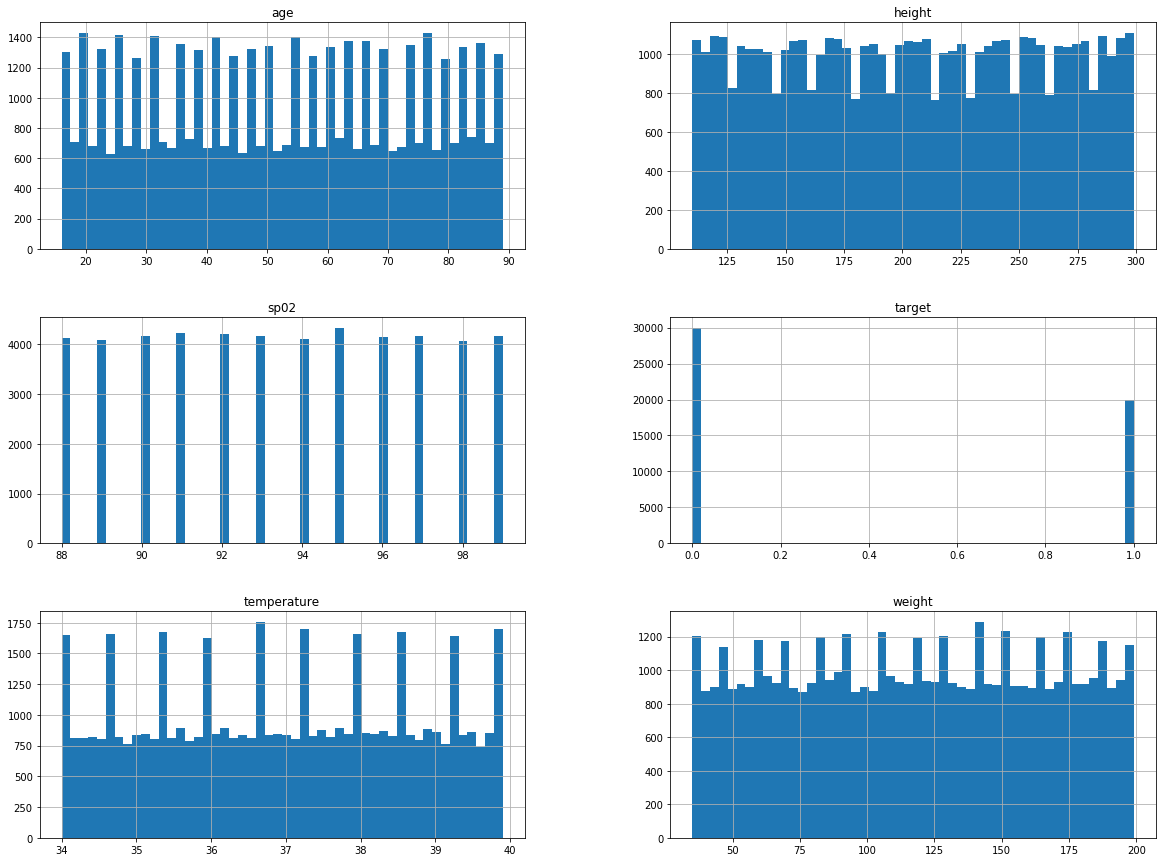

In [13]:
%matplotlib inline 
import matplotlib.pyplot as plt
dataset.hist(bins=50, figsize=(20, 15))
plt.show()

## Save the test set

In [18]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(dataset, test_size=0.2)

In [19]:
train_set.shape, test_set.shape

((40000, 13), (10000, 13))

In [20]:
# Distribution, Train
train_set.target.value_counts()

0    23990
1    16010
Name: target, dtype: int64

In [21]:
# Distribution, Test
test_set.target.value_counts()

0    6010
1    3990
Name: target, dtype: int64

In [22]:
16007/(23993+16007), 3993 / (6007+3993)

(0.400175, 0.3993)

In [23]:
dataset.dtypes

age               int64
weight            int64
height            int64
temperature     float64
sp02              int64
gender           object
fever            object
cough            object
runny_nose       object
headache         object
muscle_aches     object
fatigue          object
target            int64
dtype: object

## Encoding the categorical categories
- One Hot encoder 
- Label Encoder

A significant challenge, particularly when dealing with data that have many categorical columns, is ensuring each column gets encoded correctly.

This is particularly true with data columns that are ordered categoricals (ordinals) vs unordered categoricals. Unordered categoricals should be one-hot encoded (given the categories don't have mathematical difference i.e. yes is not greater or less than no, but 1 is greater than one), however this can significantly increase the number of features and creates features that are highly correlated with each other.

In [24]:
# Select the object (string) columns
mask = dataset.dtypes == np.object
categorical_cols = dataset.columns[mask]

In [25]:
categorical_cols

Index(['gender', 'fever', 'cough', 'runny_nose', 'headache', 'muscle_aches',
       'fatigue'],
      dtype='object')

In [26]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder

## Comparison strategy.
`LabelEncoder` used with `OneHotEncoder` Vs `OrdinalEncoder`

In [27]:
# Helper Encoding function
def ordinal_encoder(column):
    OE = OrdinalEncoder()
    encoded = OE.fit_transform(column)
    return encoded

def one_hot_encoder(column):
    OHE = OneHotEncoder()
    encoded = OHE.fit_transform(column)
    return encoded

In [28]:
# dump = [ordinal_encoder(train_set[[column]]) for column in categorical_cols]
train_set_encoded = pd.DataFrame()
for column in categorical_cols:
    encoded = ordinal_encoder(train_set[[column]])
    temp = pd.DataFrame(encoded, columns=[column])
    train_set_encoded = pd.concat([train_set_encoded, temp], axis=1)

In [29]:
train_set_encoded.head()

,gender,fever,cough,runny_nose,headache,muscle_aches,fatigue
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,1.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [30]:
df = train_set[['age', 'height', 'weight', 'target']].reset_index(drop=True)
df

,age,height,weight,target
0,68,179,102,0
1,19,250,48,1
2,69,279,64,0
3,43,125,37,1
4,64,144,146,1
...,...,...,...,...
39995,30,281,144,0
39996,37,274,67,0
39997,47,223,62,0
39998,74,130,65,1


In [31]:
train_set_encoded = pd.concat([train_set_encoded, df], axis=1)
train_set_encoded

,gender,fever,cough,runny_nose,headache,muscle_aches,fatigue,age,height,weight,target
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,68,179,102,0
1,0.0,1.0,1.0,0.0,0.0,0.0,1.0,19,250,48,1
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,69,279,64,0
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,43,125,37,1
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,64,144,146,1
...,...,...,...,...,...,...,...,...,...,...,...
39995,1.0,0.0,0.0,0.0,0.0,0.0,0.0,30,281,144,0
39996,1.0,0.0,0.0,0.0,0.0,0.0,0.0,37,274,67,0
39997,1.0,0.0,0.0,0.0,0.0,0.0,0.0,47,223,62,0
39998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,74,130,65,1


## Scaling the Numerical Features
Two scaling strategies exist, including:
- Normalization: Here the values are shifted and rescaled so that they end up in a range of 0 and 1. This is done by subtracting the minimum column value and dividing by maximum values minus the minimum.
<br>
$ \Large \frac{x - min}{max - min} $ 
- Standardization: With this method, the mean is subtracted from the values (so the values have zero mean), then divided by the standard deviation so that the result distribution has variance of one. Standardization is much lesss affected by outliers.
<br>
$ \Large \frac{x - \mu_{x}}{\sigma_{x}} $


In [32]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [33]:
# Notes:
# The feature scaling is only for original numerical columns.

## Using a Pipeline to speed up the process.
A Pipeline makes it easy to apply transforms in one go.

In [34]:
from sklearn.compose import ColumnTransformer

In [35]:
categorical_cols

Index(['gender', 'fever', 'cough', 'runny_nose', 'headache', 'muscle_aches',
       'fatigue'],
      dtype='object')

In [36]:
X_train = train_set.drop('target', axis=1)
y_train = train_set['target']
y_train

20466    0
3642     1
25146    0
3540     1
2012     1
        ..
973      0
2523     0
19028    0
6490     1
6353     0
Name: target, Length: 40000, dtype: int64

In [37]:
X_train_num = X_train.drop(categorical_cols, axis=1)
X_train_num

,age,weight,height,temperature,sp02
20466,68,102,179,38.0,98
3642,19,48,250,35.4,88
25146,69,64,279,37.9,91
3540,43,37,125,34.3,94
2012,64,146,144,39.1,95
...,...,...,...,...,...
973,30,144,281,34.2,97
2523,37,67,274,35.1,89
19028,47,62,223,39.7,95
6490,74,65,130,35.6,92


In [38]:
X_train_cat = X_train[categorical_cols]
X_train_cat

,gender,fever,cough,runny_nose,headache,muscle_aches,fatigue
20466,F,NO,NO,NO,NO,NO,NO
3642,F,YES,YES,NO,NO,NO,YES
25146,F,NO,NO,NO,NO,NO,YES
3540,M,NO,YES,NO,NO,NO,NO
2012,F,NO,NO,NO,YES,NO,NO
...,...,...,...,...,...,...,...
973,M,NO,NO,NO,NO,NO,NO
2523,M,NO,NO,NO,NO,NO,NO
19028,M,NO,NO,NO,NO,NO,NO
6490,F,NO,NO,NO,NO,NO,NO


In [39]:
num_attribs = list(X_train_num)
num_attribs

['age', 'weight', 'height', 'temperature', 'sp02']

In [40]:
cat_attribs = list(X_train_cat)
cat_attribs

['gender',
 'fever',
 'cough',
 'runny_nose',
 'headache',
 'muscle_aches',
 'fatigue']

In [44]:
# The Pipeline
# pipeline = ColumnTransformer([
#     ('scaler', MinMaxScaler(), num_attribs),
#     ('encoder', OrdinalEncoder(), cat_attribs),
# ])

pipeline = ColumnTransformer([
    ('scaler', StandardScaler(), num_attribs),
    ('encoder', OneHotEncoder(), cat_attribs),
])

# Notes:
# Can easily change to any scaler or encoder to ascertain performance.

In [45]:
X_train_prepared = pipeline.fit_transform(train_set)
X_train_prepared.shape

(40000, 19)

In [46]:
X_train_prepared

array([[ 0.72561071, -0.3174497 , -0.46995479, ...,  0.        ,
         1.        ,  0.        ],
       [-1.57215419, -1.44913285,  0.82249757, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.77250387, -1.11381933,  1.35040065, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [-0.25914568, -1.15573352,  0.3310016 , ...,  0.        ,
         1.        ,  0.        ],
       [ 1.00696968, -1.09286223, -1.36192896, ...,  0.        ,
         1.        ,  0.        ],
       [-1.29079523, -1.53296123, -0.61558323, ...,  0.        ,
         1.        ,  0.        ]])

## Select and Train Model
Start with the simplest models and evaluate.
- Logistic regression; is a statistical model that in its basic form uses a logistic function to model a binary dependent variable.

In [48]:
# 1. Logistic Regression
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=42)

# 2. SGDClassifier
# from sklearn.linear_model import SGDClassifier
# clf = SGDClassifier(loss="hinge", penalty="l2", max_iter=200)

# 3. DecisionTreeClassifier
# from sklearn.tree import DecisionTreeClassifier
# clf = DecisionTreeClassifier()

# 4. RandomForestClassifier
# from sklearn.ensemble import RandomForestClassifier
# clf = RandomForestClassifier()

# 5. SVM
# from sklearn import svm
# from sklearn.utils import shuffle
# from sklearn.model_selection import GridSearchCV

# parameters = {'gamma' : shuffle([.1, 1, 4]),
#               'C'     : shuffle([10, 15]),
#               'kernel': ['poly', 'rbf']
#             }

# svc  = svm.SVC()
# GSCV = GridSearchCV(svc, param_grid=parameters, verbose=True, scoring='accuracy', n_jobs=-1)

In [49]:
# Fit the data
clf.fit(X_train_prepared, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Save the model

In [52]:
from joblib import dump, load
dump(clf, 'epms.joblib')

['epms.joblib']

## Performance Measures
Evaluation of the model, a test on the second example was done above, and it was correct, but we need a mathematically robust evaluation.

In [50]:
from sklearn.model_selection import cross_val_score
cross_val_score(clf, X_train_prepared, y_train, cv=5, scoring="accuracy")
# cross_val_score(clf, X_train_prepared, y_train, cv=5, scoring="accuracy")

array([0.69925 , 0.6945  , 0.703875, 0.6885  , 0.696875])

Roughly, 70%. Not so good.

In [43]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(clf, X_train_prepared, y_train, cv=5)
y_train_pred

array([0, 0, 0, ..., 1, 0, 0])

In [44]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, y_train_pred)

array([[15739,  8254],
       [10025,  5982]])

In [45]:
from sklearn.metrics import precision_score, recall_score

In [46]:
precision_score(y_train, y_train_pred)

0.4202023040179826

In [47]:
recall_score(y_train, y_train_pred)

0.37371150121821706

In [48]:
from sklearn.metrics import f1_score

In [120]:
f1_score(y_train, y_train_pred)

0.39523290746426326

Just a 3% better than a random guess.